# Importing modules

In [1]:
import MetaTrader5 as mt5
import time
import threading
import functions as fp
import matplotlib.pyplot as plt

## Connecting to MT5 server

In [2]:
mt5.initialize()

True

## Login to MT5

In [3]:
login = input('Enter your login: ')
password = input('Enter your password: ')
server = input('Enter the server name: ')

if not login:
    login = "SsaliBenjamin"

if not password:
    password = "PRKJRAYr"
    
if not server:
    server = "MetaQuotes-Demo"

# Use a default port value if the user does not provide input
port = input('Enter the server port: ')
if not port:
    port = 8222
else:
    port = int(port)

# Attempt to log in to the server and handle any errors that may occur
try:
    result = mt5.login(login, password, server, port)
    if result == 0:
        print('Successfully logged in')
    else:
        print('Login failed')
except Exception as e:
    print(f'An error occurred while attempting to log in: {e}')

Successfully logged in


## Getting data from high frequency server

In [4]:
# Get data for the past 24hrs
data = fp.fetchPastData(mt5)
# Filter data 
data = fp.filterData(data)
# Calculate EMA, RSI, ATR, and MACD 
data = fp.calcTools(data)
# Store in JSON
data.to_csv('./pastdata.csv', index=False)


## Create and store orders in order book.

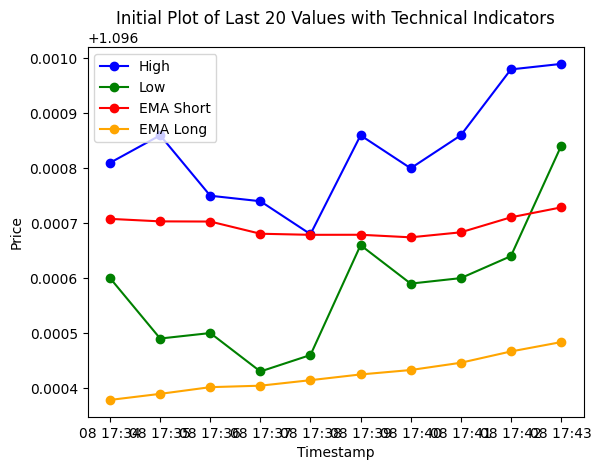

C:\Users\DELL\AppData\Local\Temp\ipykernel_17020\382392244.py:9: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  animation = FuncAnimation(fig, lambda _: fp.ticksUpdate(mt5, data, ax), interval=10000)  # Update every 10 seconds


Buy: 2024-01-08 11:47:00, Price: 1.09373, Capital: 9998.90627
Sell: 2024-01-08 13:38:00, Price: 1.09388, Capital: 10000.00015
Buy: 2024-01-08 14:07:00, Price: 1.09447, Capital: 9998.90568
Sell: 2024-01-08 14:33:00, Price: 1.09372, Capital: 9999.9994
Buy: 2024-01-08 14:49:00, Price: 1.09462, Capital: 9998.90478
Buy: 2024-01-08 11:47:00, Price: 1.09373, Capital: 9998.90627
Sell: 2024-01-08 13:38:00, Price: 1.09388, Capital: 10000.00015
Buy: 2024-01-08 14:07:00, Price: 1.09447, Capital: 9998.90568
Sell: 2024-01-08 14:33:00, Price: 1.09372, Capital: 9999.9994
Buy: 2024-01-08 14:49:00, Price: 1.09462, Capital: 9998.90478
Buy: 2024-01-08 11:47:00, Price: 1.09373, Capital: 9998.90627
Sell: 2024-01-08 13:38:00, Price: 1.09388, Capital: 10000.00015
Buy: 2024-01-08 14:07:00, Price: 1.09447, Capital: 9998.90568
Sell: 2024-01-08 14:33:00, Price: 1.09372, Capital: 9999.9994
Buy: 2024-01-08 14:49:00, Price: 1.09462, Capital: 9998.90478


KeyboardInterrupt: 

In [5]:
 # Set up the initial plot
from matplotlib.animation import FuncAnimation


fig, ax = plt.subplots()

# Display inital tick data:
fp.displayTicks(data, ax)
animation = FuncAnimation(fig, lambda _: fp.ticksUpdate(mt5, data, ax), interval=10000)  # Update every 10 seconds
plt.show()
while(True):
    time.sleep(60)
    fp.someStrategy(data)
    

In [6]:
data

,time,open,high,low,close,tick_volume,spread,real_volume,timestamp,EMA_short,EMA_long,RSI,ATR,MACD
0,1704705840,1.09461,1.09465,1.09453,1.09464,73,1,0,2024-01-08 09:24:00,NaN,NaN,NaN,0.000000,NaN
1,1704705900,1.09464,1.09472,1.09456,1.09461,208,1,0,2024-01-08 09:25:00,NaN,NaN,NaN,0.000000,NaN
2,1704705960,1.09462,1.09463,1.09452,1.09463,142,1,0,2024-01-08 09:26:00,NaN,NaN,NaN,0.000000,NaN
3,1704706020,1.09462,1.09478,1.09462,1.09472,97,1,0,2024-01-08 09:27:00,NaN,NaN,NaN,0.000000,NaN
4,1704706080,1.09471,1.09480,1.09463,1.09472,114,1,0,2024-01-08 09:28:00,NaN,NaN,NaN,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1704735540,1.09666,1.09686,1.09666,1.09668,264,0,0,2024-01-08 17:39:00,1.096679,1.096425,51.653982,0.000258,-0.000051
496,1704735600,1.09668,1.09680,1.09659,1.09663,207,0,0,2024-01-08 17:40:00,1.096674,1.096433,50.105856,0.000255,-0.000050
497,1704735660,1.09663,1.09686,1.09660,1.09677,191,0,0,2024-01-08 17:41:00,1.096683,1.096446,54.241270,0.000255,-0.000039
498,1704735720,1.09675,1.09698,1.09664,1.09697,331,0,0,2024-01-08 17:42:00,1.096711,1.096466,59.416245,0.000261,-0.000018


## Shutdown MT5.

In [ ]:
mt5.shutdown()